In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2
import os

In [3]:
json_file = '../sample_data/red_lasers/sample_data_truth.json'
image_folder = '../sample_data/red_lasers/sample_data'

# load data
with open(json_file, 'r') as file:
    image_data = json.load(file)

In [5]:
def draw_dots(points, ax, color):
    ax.scatter(points[:, 0], points[:, 1], color=color, s=10)

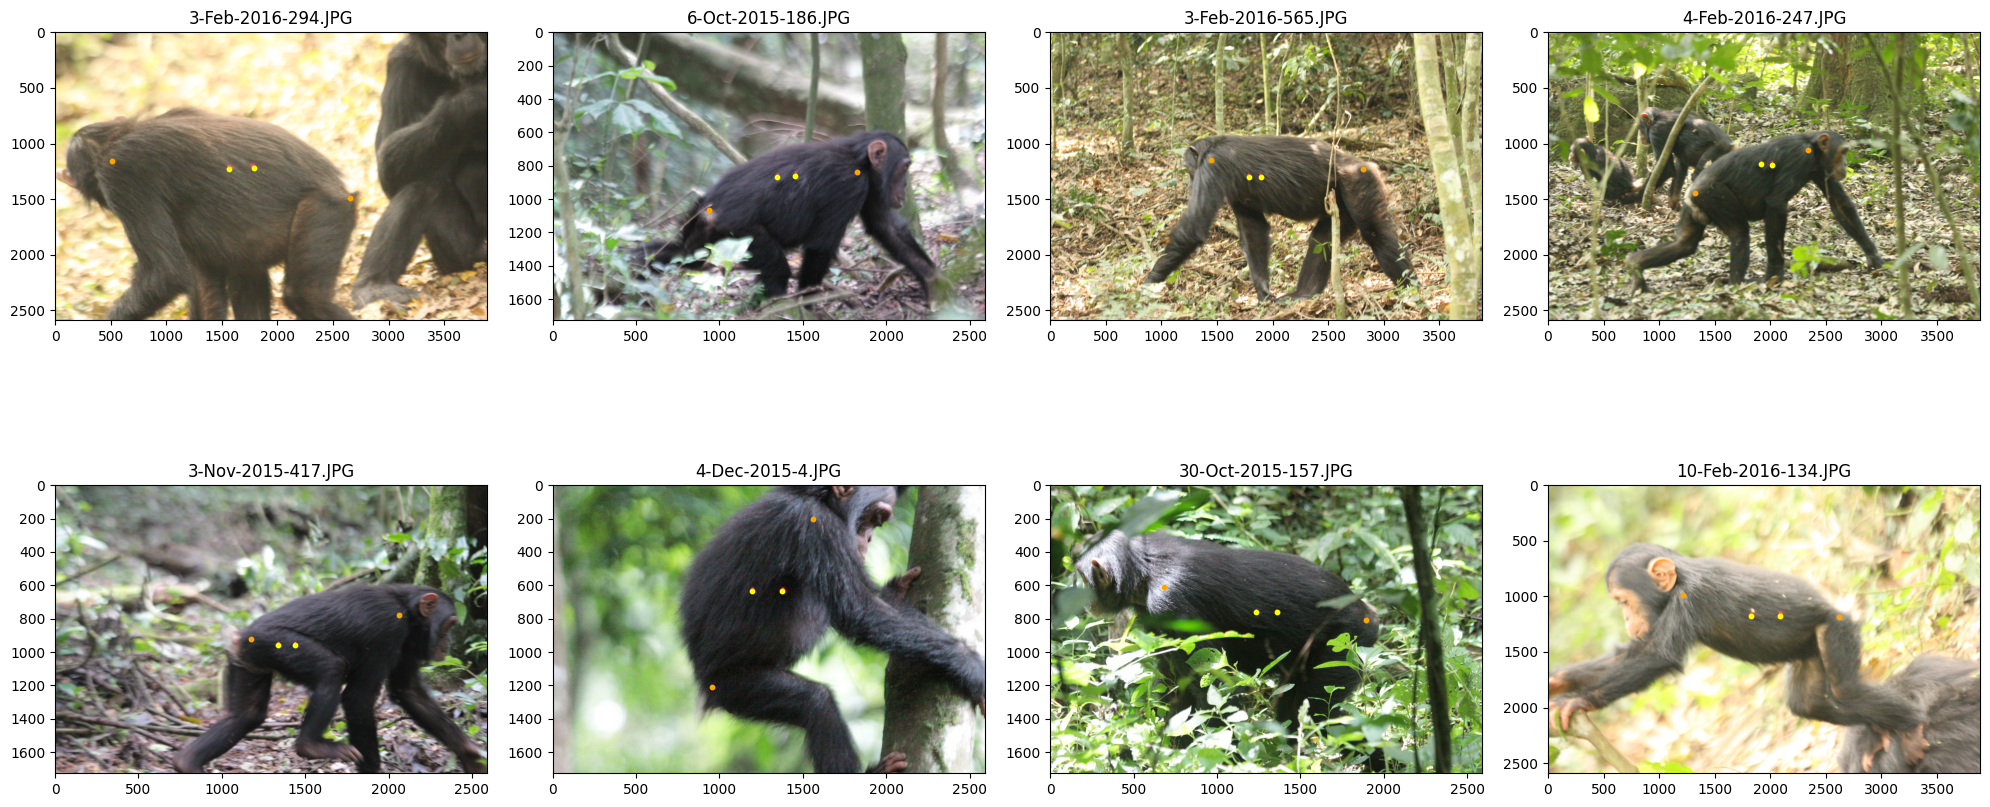

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# flatten axes for easy indexing
axs = axs.flatten()

idx = 0
# iterate through each entry in json
for image_name, info in image_data.items():
    image_path = os.path.join(image_folder, image_name)
    # load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for plotting

    if img is not None:
        # extract coordinates
        laser_points = np.array(info['laser_points'])
        body_points = np.array(info['body_points'])

        # plot image
        axs[idx].imshow(img)
        draw_dots(laser_points, axs[idx], 'yellow')
        draw_dots(body_points, axs[idx], 'orange')
        axs[idx].set_title(image_name)

        idx += 1
    else:
        print(f"Could not load image: {image_name}")

plt.tight_layout()
plt.show()